# 1. Import Libraries

In [25]:
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge, ARDRegression, LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 2. Import Data (Diabetes Dataset)

In [26]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

print(f"Dataset shape: {X.shape}")
print("Feature names:", diabetes.feature_names)

Dataset shape: (442, 10)
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# 3. Preprocess / Feature Scaling (Inside Pipelines or Manual)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5. Define Regressors

In [29]:
ols = LinearRegression()
bayesian_ridge = BayesianRidge()
ard = ARDRegression()

regressors = {
    "Linear Regression (OLS)": ols,
    "Bayesian Ridge Regression": bayesian_ridge,
    "ARD Regression": ard,
}

# 6. Fit Models

In [30]:
for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    print(f"{name} fitted successfully.")

Linear Regression (OLS) fitted successfully.
Bayesian Ridge Regression fitted successfully.
ARD Regression fitted successfully.


# 7. Test Models and Print Scores

In [31]:
for name, reg in regressors.items():
    y_pred = reg.predict(X_test)
    print(f"\n{name}")
    print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")


Linear Regression (OLS)
R^2 Score: 0.4526
Mean Squared Error: 2900.1936

Bayesian Ridge Regression
R^2 Score: 0.4580
Mean Squared Error: 2871.7621

ARD Regression
R^2 Score: 0.4670
Mean Squared Error: 2823.7391


# 8. Visualize Coefficients

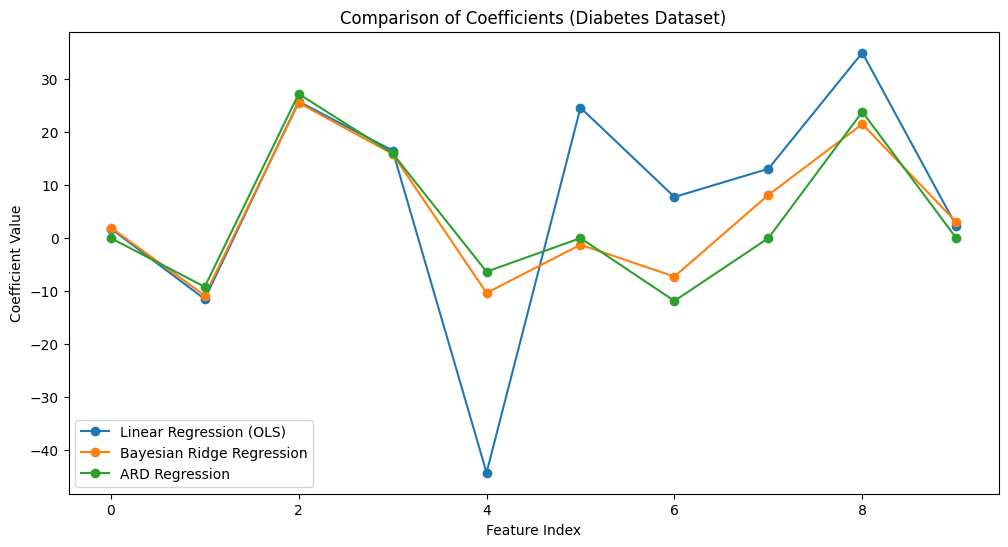

In [32]:
plt.figure(figsize=(12, 6))
for name, reg in regressors.items():
    plt.plot(reg.coef_, marker='o', label=name)

plt.title("Comparison of Coefficients (Diabetes Dataset)")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()